# Import

In [1]:
#Numpy
import numpy as np
#Load dataset from dataset folder
import os
#Process image
import cv2 as cv
#Graph
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Variable

In [2]:
#Path of the different folders
train_path = './dataset/chest_Xray/train/'
val_path = './dataset/chest_Xray/val/'
test_path = './dataset/chest_Xray/test/'

In [3]:
#Labels
labels=['NORMAL', 'PNEUMONIA']

In [4]:
#Setting image size
image_size = 100

# Process Data

In [5]:
#load dataset folder, turn image to gray, resize image, concat image with class/label
def process_data(data_dir, labels, image_size): 
    images = []
    for label in labels:
        dir = os.path.join(data_dir,label)
        class_num = labels.index(label)
        for image in os.listdir(dir):    
            if image == '.DS_Store':
                continue
            image_read = cv.imread(os.path.join(dir,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
    return np.array(images)

In [6]:
train = process_data(train_path, labels, image_size)
test = process_data(test_path, labels, image_size)
val = process_data(val_path, labels, image_size)
print(train.shape)
print(val.shape)
print(test.shape)

/tmp/ipykernel_98791/3129347469.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


(5216, 2)
(16, 2)
(624, 2)


PNEUMONIA


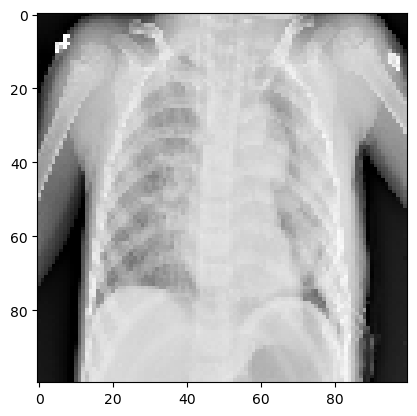

In [7]:
#show pneumonia
plt.imshow(train[2000][0], cmap='gray')
print(labels[train[2000][1]])  

NORMAL


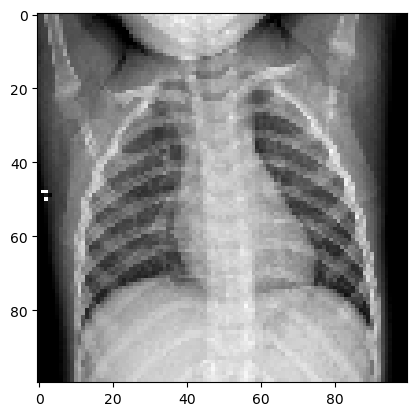

In [8]:
#show normal
plt.imshow(train[1000][0], cmap='gray')
print(labels[train[1000][1]])

In [9]:
#separate feature and labels/target
#Reshaping data in order to feed it into the Neural Network
def separate_feature_label(data): 
    
    X = []
    y = []

    for feature, label in data:  
        X.append(feature)          #appending all images
        y.append(label)            #appending all labels
        
    return X, y

In [10]:
def reshape_feature_label(X,y):
    #Reshaping data in order to feed it into the Neural Network
    X = np.array(X)
    X = X.reshape((X.shape[0], -1))
    y = np.array(y)
    return X, y

In [11]:
X_train,y_train = separate_feature_label(train)
X_train,y_train = reshape_feature_label(X_train,y_train)
print(X_train.shape,y_train.shape)

X_val,y_val = separate_feature_label(val)
X_val,y_val = reshape_feature_label(X_val,y_val)
print(X_val.shape,y_val.shape)

X_test,y_test = separate_feature_label(test)
X_test,y_test = reshape_feature_label(X_test,y_test)
print(X_test.shape,y_test.shape)

(5216, 10000) (5216,)
(16, 10000) (16,)
(624, 10000) (624,)


# Preprocess

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

# Model

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4; 1/8] START activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4; 1/8] END activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.956 total time=  13.8s
[CV 2/4; 1/8] START activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4; 1/8] END activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.953 total time=  12.9s
[CV 3/4; 1/8] START activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4; 1/8] END activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.961 total time=  13.5s
[CV 4/4; 1/8] START activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4; 1/8] END activation=tanh, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.958 total time=  12.3s
[CV 1/4; 2/8] START activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4; 2/8] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.949 total time=  15.1s
[CV 2/4; 2/8] START activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4; 2/8] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.954 total time=  13.6s
[CV 3/4; 2/8] START activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4; 2/8] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.956 total time=  14.2s
[CV 4/4; 2/8] START activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4; 2/8] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.958 total time=  14.3s
[CV 1/4; 3/8] START activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs
[CV 1/4; 3/8] END activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.952 total time=   3.8s
[CV 2/4; 3/8] START activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs
[CV 2/4; 3/8] END activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.958 total time=   1.6s
[CV 3/4; 3/8] START activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs
[CV 3/4; 3/8] END activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.959 total time=   3.8s
[CV 4/4; 3/8] START activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4; 3/8] END activation=relu, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.966 total time=  11.0s
[CV 1/4; 4/8] START activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs
[CV 1/4; 4/8] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.952 total time=   3.2s
[CV 2/4; 4/8] START activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs
[CV 2/4; 4/8] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.969 total time=   2.6s
[CV 3/4; 4/8] START activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs
[CV 3/4; 4/8] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.956 total time=   8.1s
[CV 4/4; 4/8] START activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs
[CV 4/4; 4/8] END activation=relu, hidden_layer_sizes=(10, 5)

/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4; 7/8] END activation=logistic, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.952 total time=  12.4s
[CV 2/4; 7/8] START activation=logistic, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4; 7/8] END activation=logistic, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.953 total time=  13.4s
[CV 3/4; 7/8] START activation=logistic, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4; 7/8] END activation=logistic, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.959 total time=  12.4s
[CV 4/4; 7/8] START activation=logistic, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/4; 7/8] END activation=logistic, hidden_layer_sizes=(5, 2), learning_rate=adaptive, solver=lbfgs;, score=0.953 total time=  12.5s
[CV 1/4; 8/8] START activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/4; 8/8] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.945 total time=  14.9s
[CV 2/4; 8/8] START activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/4; 8/8] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.955 total time=  14.4s
[CV 3/4; 8/8] START activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/4; 8/8] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.946 total time=  14.2s
[CV 4/4; 8/8] START activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs


/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/samy/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/samy/anaconda3/lib/python3.10/site-package

[CV 4/4; 8/8] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=lbfgs;, score=0.955 total time=  15.5s
{'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
{'mean_fit_time': array([13.10822779, 14.287444  ,  5.00005972,  4.13023621,  0.09254199,
        0.07452887, 12.65891659, 14.73298341]), 'std_fit_time': array([5.63015265e-01, 5.37275541e-01, 3.55023359e+00, 2.27743521e+00,
       8.08636785e-03, 2.09057173e-03, 4.40717827e-01, 4.97534820e-01]), 'mean_score_time': array([0.01366609, 0.01554048, 0.01571667, 0.01501942, 0.        ,
       0.        , 0.01452553, 0.01612675]), 'std_score_time': array([0.00010554, 0.00180643, 0.00190573, 0.00058827, 0.        ,
       0.        , 0.0010878 , 0.00199625]), 'param_activation': masked_array(data=['tanh', 'tanh', 'relu', 'relu', 'sigmoid', 'sigmoid',
                   'logistic', 'logistic'],
             mask=[False, False, False, False, False, False, Fals

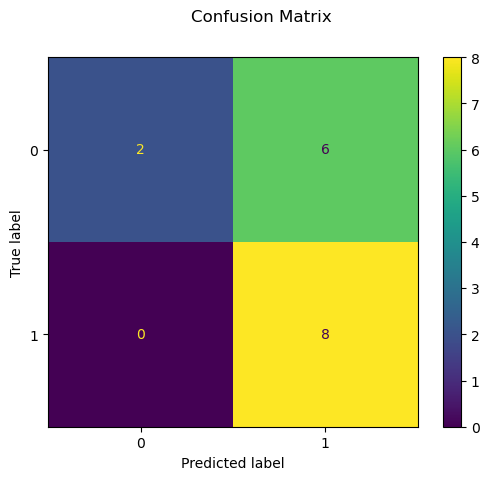

ROC AUC score: 0.7102564102564102
Classification report for classifier MLPClassifier():
              precision    recall  f1-score   support

           0       0.91      0.45      0.60       234
           1       0.75      0.97      0.84       390

    accuracy                           0.78       624
   macro avg       0.83      0.71      0.72       624
weighted avg       0.81      0.78      0.75       624


Confusion matrix:
[[105 129]
 [ 11 379]]


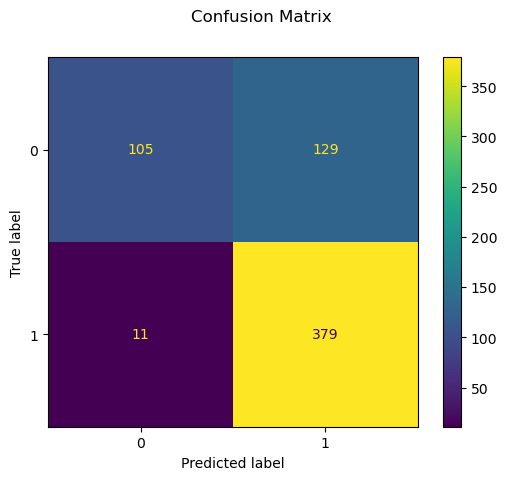

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

mlp = MLPClassifier(max_iter=200)

#CrossValidation

# param_grid = {
#     'hidden_layer_sizes': [(5, 2),(10,)],
#     'activation': ['tanh', 'relu', 'sigmoid','logistic'],
#     'solver': ['lbfgs','sgd', 'adam'],
#     'learning_rate': ['constant', 'adaptive']
# }

param_grid = {
    'hidden_layer_sizes':[(5, 2), (10,5)],
    'activation': ['tanh', 'relu', 'sigmoid','logistic'],
    'solver': ['lbfgs'],
    'learning_rate': ['adaptive']
}

grid_search = GridSearchCV(mlp, param_grid, cv=4, verbose=10)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
cv_result = grid_search.cv_results_

print(best_params)
print(cv_result)

#-----val------

y_pred_val = grid_search.best_estimator_.predict(X_val)

#metrics
roc_auc = roc_auc_score(y_val, y_pred_val)
print("ROC AUC score:", roc_auc)
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_val, y_pred_val)}\n"
)

#matrice de confusion
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

#-----test-----
y_pred_test = grid_search.best_estimator_.predict(X_test)

#metrics
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score:", roc_auc)
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, y_pred_test)}\n"
)

#matrice de confusion
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()
